## Project Description
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

In [1]:
# Import libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the data set
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


## EDA

In [4]:
#First we check shape of the dataset
df.shape

(1338, 7)

In [5]:
# So we have 1338 rows and 7 columns

In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [8]:
# So we have 7 columns in which charges is out target feature and rest is our independent feature

In [9]:
# we will check the data type of columns
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
# Check the null values in the dataset
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
# We can see there is no null value present in the dataset

In [12]:
df.isnull().sum().sum()

0

In [13]:
# Checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [14]:
# We have 2 float data type, 2 int64 and 3 object datatype out target variable is float data type mean regression problem

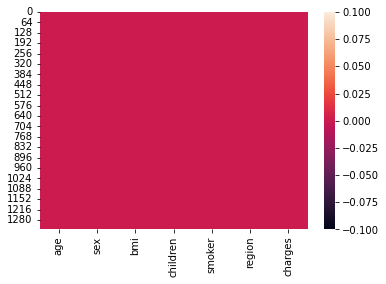

In [15]:
sns.heatmap(df.isnull())
plt.show()

In [16]:
# Check the unique value in the dataset

for i in df.columns:
    print('column name', i)
    print('Number of unique value:', df[i].nunique())
    print('\n')

column name age
Number of unique value: 47


column name sex
Number of unique value: 2


column name bmi
Number of unique value: 548


column name children
Number of unique value: 6


column name smoker
Number of unique value: 2


column name region
Number of unique value: 4


column name charges
Number of unique value: 1337




In [17]:
# we can see the count of unique values present in the each columns, in target feature each row have diff output

In [18]:
# Check the value count of the columns
for i in df.columns:
    print('Column name:', i)
    print('value count:', df[i].value_counts())
    print('\n')

Column name: age
value count: 18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


Column name: sex
value count: male      676
female    662
Name: sex, dtype: int64


Column name: bmi
value count: 32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


Column name: children
value count: 0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


Column name: smoker
value count: no     1064
yes     274
Name: smoker, dtype: int64


Column name: region

In [19]:
# checking the statistical value of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [20]:
# we can observe that every column has equal count means no missing value
# In each column mean value is equal of 50% means there is no skewness present in the dataset
# Max value is also looks fine means no outliers present in the datset

## Graphical analysis

In [21]:
x=df.drop(columns=['charges'])
y=df['charges']

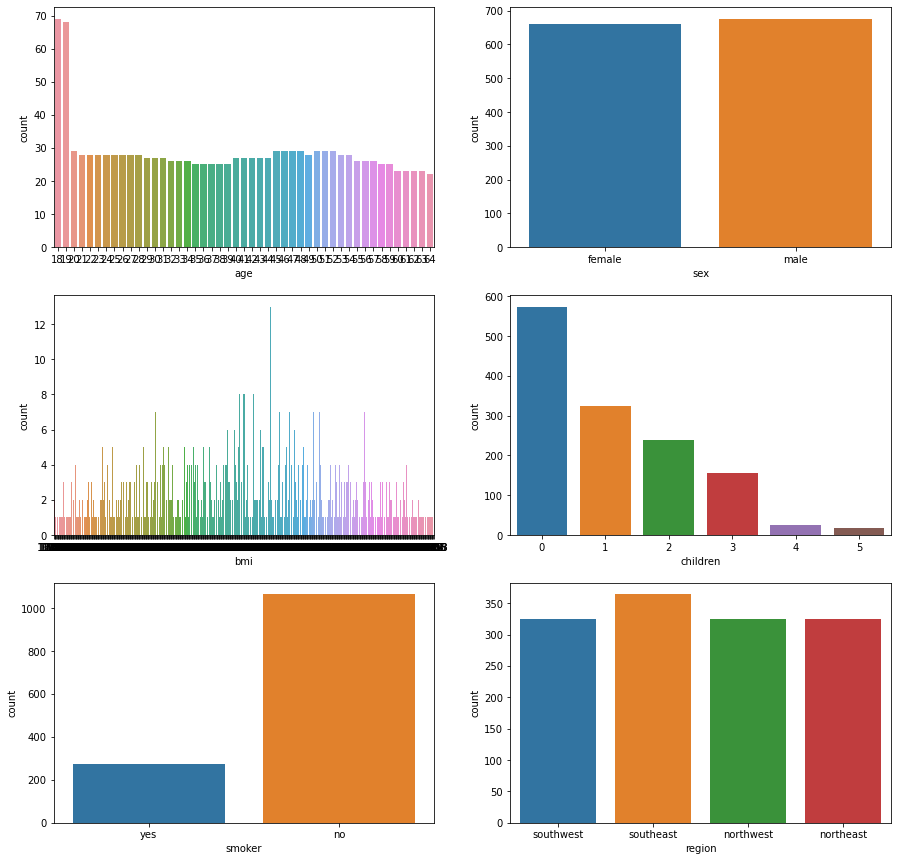

In [22]:
# check the count plot of dataset
plt.figure(figsize=(15,15))
plotnumber=1


for i in x:
    if plotnumber<=13:
        axs=plt.subplot(3,2,plotnumber)
        sns.countplot(x=i, data=df)
    plotnumber+=1
plt.show()

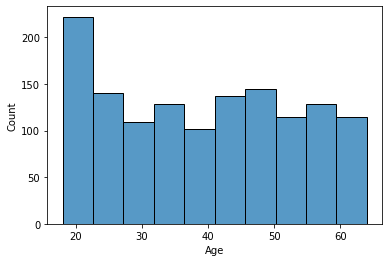

In [23]:
# Check for age column

sns.histplot(df.age, bins=10)
plt.xlabel('Age')
plt.show()

In [24]:
# we can see that most number of age falls in 18-21 age bracket.

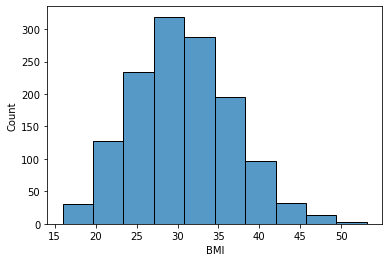

In [25]:
# Check for BMI
sns.histplot(df.bmi, bins=10)
plt.xlabel('BMI')
plt.show()

In [26]:
# We can see most number of peoper BMI fall under 27 to 34.

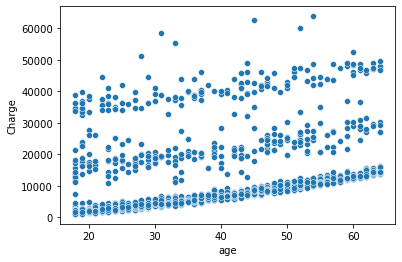

In [27]:
# check for age and charge relation
sns.scatterplot(x=df.age, y=df.charges)
plt.xlabel('age')
plt.ylabel('Charge')
plt.show()

In [28]:
# We can see that age and charges has linear relation with each other, if age increases charge of insurence also increases

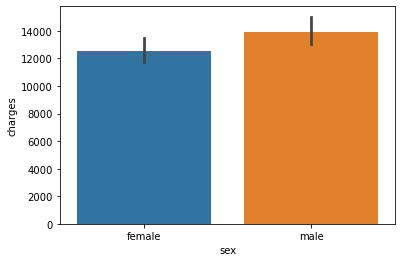

In [29]:
# Check for sex and charge column
sns.barplot(x=df.sex, y=df.charges)
plt.xlabel('sex')
plt.ylabel('charges')
plt.show()

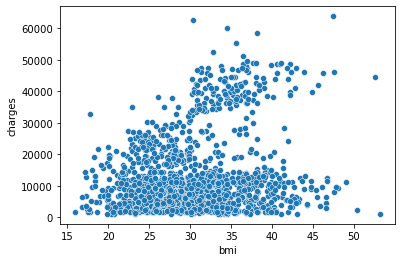

In [30]:
# check for BMI and charges
sns.scatterplot(x=df.bmi, y=df.charges)
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show()

In [31]:
# BMI also has the linear relation with charges.

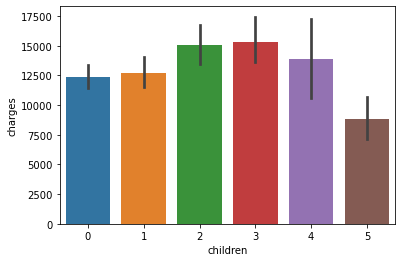

In [32]:
# check for children and charges
sns.barplot(x=df.children, y=df.charges)
plt.xlabel('children')
plt.ylabel('charges')
plt.show()

In [33]:
# We can see the people who has 2 or 3 children there insurence charges also increases.

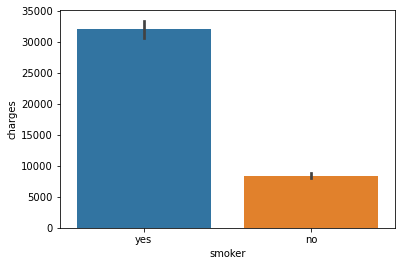

In [34]:
# check for smoker and charges
sns.barplot(x=df.smoker, y=df.charges)
plt.xlabel('smoker')
plt.ylabel('charges')
plt.show()

In [35]:
# we can see that people who smock they have higher insurence charge compred to non smoker

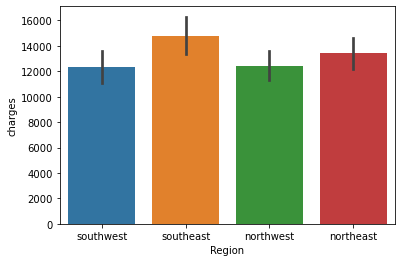

In [36]:
# check for region and charges
sns.barplot(x=df.region, y=df.charges)
plt.xlabel('Region')
plt.ylabel('charges')
plt.show()

In [37]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [38]:
# shorting the numbric and object data type
number=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        number.append(i)
print('Niumberic_col', number) 

print('\n')

category=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        category.append(i)
print('Category_col', category)

Niumberic_col ['age', 'bmi', 'children', 'charges']


Category_col ['sex', 'smoker', 'region']


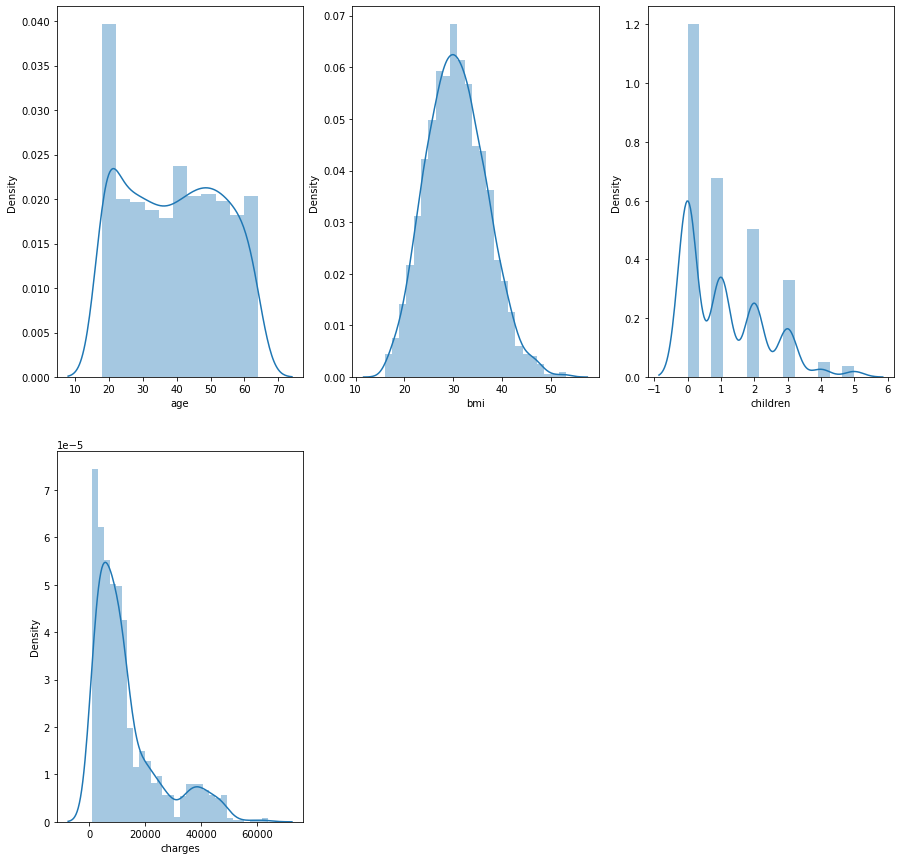

In [39]:
# Check the distribution of the dataset
plt.figure(figsize=(15,15))
plotnumber=1
for i in number:
    if plotnumber<=14:
        axs=plt.subplot(2,3,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i, fontsize=10)
    plotnumber+=1
plt.show()

In [40]:
# Dataset look fine all columns are normally distributed

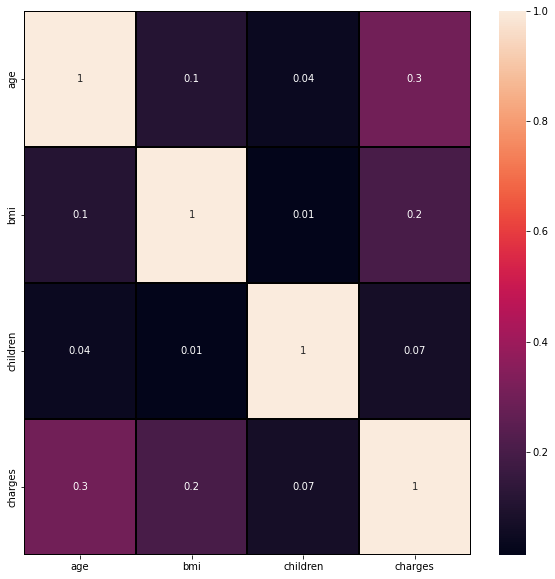

In [41]:
# Check the correlation 

cor=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor, annot=True, fmt='.1g', linewidths=0.1, linecolor='black')
plt.show()

In [42]:
# We can see the correlation between the columns

In [43]:
# Convert the categorical columns to numberical columns

# fir we will replace the sex and smocker column there is only 2 unique values so we will replace them with 0 and 1

df['sex']=df['sex'].replace({'male':1,'female':0})
df['smoker']=df['smoker'].replace({'yes':0,'no':1})

In [44]:
df['sex'].unique()

array([0, 1], dtype=int64)

In [45]:
df['smoker'].unique()

array([0, 1], dtype=int64)

In [46]:
# we have sucessfully changed sex and smoker column, lets change regio column also

In [47]:
# We will encode region with get dummies 
encoded_df= pd.get_dummies(df['region'])

In [50]:
df = pd.concat([df, encoded_df], axis=1)
df.drop(columns=['region'], inplace=True)

In [51]:
df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,0,16884.92400,0,0,0,1
1,18,1,33.770,1,1,1725.55230,0,0,1,0
2,28,1,33.000,3,1,4449.46200,0,0,1,0
3,33,1,22.705,0,1,21984.47061,0,1,0,0
4,32,1,28.880,0,1,3866.85520,0,1,0,0


In [52]:
# Standardise the dataset
x=df.drop(columns=['charges'])
y=df['charges']

In [53]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x=scaler.fit_transform(x)

# Model building

In [55]:
# Train Test split the datset
from sklearn.model_selection import train_test_split

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [60]:
from sklearn.linear_model import LinearRegression 
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)

In [61]:
LR.score(x_train,y_train)

0.7423980090600258

In [ ]:
# so score with train is 74%

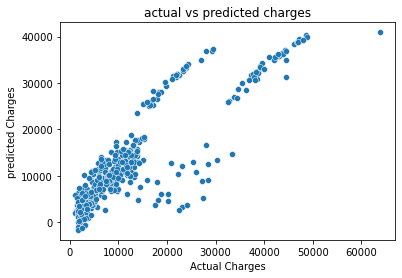

In [63]:
sns.scatterplot(y_test,pred_LR)
plt.xlabel('Actual Charges')
plt.ylabel('predicted Charges')
plt.title('actual vs predicted charges')
plt.show()

In [64]:
LR.score(x_test,y_test)

0.769611805436901

In [65]:
# And score with test is 76% in Linerar regression model

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
RFR.score(x_train,y_train)

0.9770622464581443

In [68]:
RFR_pred=RFR.predict(x_test)
RFR.score(x_test,y_test)

0.8547670330447987

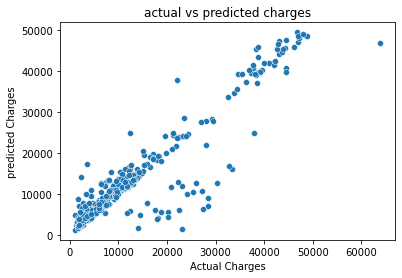

In [70]:
sns.scatterplot(y_test,RFR_pred)
plt.xlabel('Actual Charges')
plt.ylabel('predicted Charges')
plt.title('actual vs predicted charges')
plt.show()

In [77]:
# So we can see that Randomforest Regressor give good result with 85%